# Train Machine Learning Model (Random Forest)

### Import libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/quality-defect.csv")


### Encode Categorical Columns

In [4]:
le_supplier = LabelEncoder()
le_item = LabelEncoder()
le_compliance = LabelEncoder()

df["Supplier_ID_encoded"] = le_supplier.fit_transform(df["Supplier_ID"])
df["Item_ID_encoded"] = le_item.fit_transform(df["Item_ID"])
df["Compliance_Flag_encoded"] = le_compliance.fit_transform(df["Compliance_Flag"])

In [5]:
# Features (inputs)
X = df[[
    "Lead_Time_Days",
    "Supplier_Rating",
    "Quantity_Ordered",
    "Unit_Price",
    "Supplier_ID_encoded",
    "Item_ID_encoded",
    "Compliance_Flag_encoded"
]]

# Target (output)
y = df["Is_Defective"]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
y_pred = rf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.03      0.05        32
           1       0.65      0.85      0.74        68

    accuracy                           0.59       100
   macro avg       0.37      0.44      0.39       100
weighted avg       0.47      0.59      0.52       100



### Plot


In [9]:
importances = rf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values()

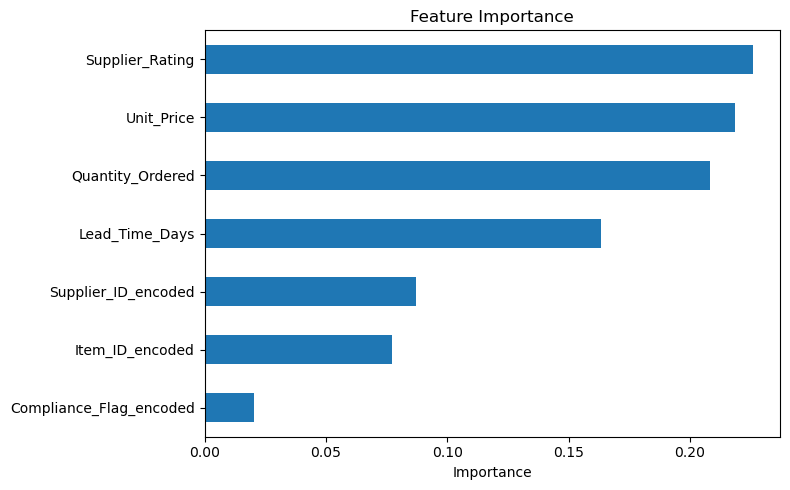

In [10]:
plt.figure(figsize=(8,5))
feat_imp.plot(kind="barh")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()

plt.savefig("../output/feature_importance.png")  
plt.show()

In [11]:
feat_imp.to_frame(name="Importance").reset_index().rename(columns={"index": "Feature"}).to_csv("../output/feature_importance.csv", index=False)